In [110]:
from keras.models import load_model
import pandas as pd
import keras.backend as K
from keras.callbacks import LearningRateScheduler
from keras.callbacks import Callback
import math
import numpy as np
import matplotlib.pyplot as plt

def coeff_r2(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [2]:
model = load_model('./FPV_ANN_tabulated_Standard_4Res_500n.H5')
# model = load_model('../tmp/calc_100_3_3_cbrt.h5', custom_objects={'coeff_r2':coeff_r2})
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          2000        input_1[0][0]                    
__________________________________________________________________________________________________
res1a_branch2a (Dense)          (None, 500)          250500      dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 500)          0           res1a_branch2a[0][0]             
__________________________________________________________________________________________________
dropout_1 

/home/eg/anaconda3/envs/my_dev/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

class data_scaler(object):
    def __init__(self):
        self.norm = None
        self.norm_1 = None
        self.std = None
        self.case = None
        self.scale = 1
        self.bias = 1e-20
#         self.bias = 1


        self.switcher = {
            'min_std': 'min_std',
            'std2': 'std2',
            'std_min':'std_min',
            'min': 'min',
            'no':'no',
            'log': 'log',
            'log_min':'log_min',
            'log_std':'log_std',
            'log2': 'log2',
            'sqrt_std': 'sqrt_std',
            'cbrt_std': 'cbrt_std',
            'nrt_std':'nrt_std',
            'tan': 'tan'
        }

    def fit_transform(self, input_data, case):
        self.case = case
        if self.switcher.get(self.case) == 'min_std':
            self.norm = MinMaxScaler()
            self.std = StandardScaler()
            out = self.norm.fit_transform(input_data)
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'std2':
            self.std = StandardScaler()
            out = self.std.fit_transform(input_data)

        if self.switcher.get(self.case) == 'std_min':
            self.norm = MinMaxScaler()
            self.std = StandardScaler()
            out = self.std.fit_transform(input_data)
            out = self.norm.fit_transform(out)

        if self.switcher.get(self.case) == 'min':
            self.norm = MinMaxScaler()
            out = self.norm.fit_transform(input_data)

        if self.switcher.get(self.case) == 'no':
            self.norm = MinMaxScaler()
            self.std = StandardScaler()
            out = input_data

        if self.switcher.get(self.case) == 'log_min':
            out = - np.log(np.asarray(input_data / self.scale) + self.bias)
            self.norm = MinMaxScaler()
            out = self.norm.fit_transform(out)

        if self.switcher.get(self.case) == 'log_std':
            out = - np.log(np.asarray(input_data / self.scale) + self.bias)
            self.std = StandardScaler()
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'log2':
            self.norm = MinMaxScaler()
            self.std = StandardScaler()
            out = self.norm.fit_transform(input_data)
            out = np.log(np.asarray(out) + self.bias)
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'sqrt_std':
            out = np.sqrt(np.asarray(input_data / self.scale))
            self.std = StandardScaler()
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'cbrt_std':
            out = np.cbrt(np.asarray(input_data / self.scale))
            self.std = StandardScaler()
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'nrt_std':
            out = np.power(np.asarray(input_data / self.scale),1/4)
            self.std = StandardScaler()
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'tan':
            self.norm = MaxAbsScaler()
            self.std = StandardScaler()
            out = self.std.fit_transform(input_data)
            out = self.norm.fit_transform(out)
            out = np.tan(out / (2 * np.pi + self.bias))

        return out

    def transform(self, input_data):
        if self.switcher.get(self.case) == 'min_std':
            out = self.norm.transform(input_data)
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'std2':
            out = self.std.transform(input_data)

        if self.switcher.get(self.case) == 'std_min':
            out = self.std.transform(input_data)
            out = self.norm.transform(out)

        if self.switcher.get(self.case) == 'min':
            out = self.norm.transform(input_data)

        if self.switcher.get(self.case) == 'no':
            out = input_data

        if self.switcher.get(self.case) == 'log_min':
            out = - np.log(np.asarray(input_data / self.scale) + self.bias)
            out = self.norm.transform(out)

        if self.switcher.get(self.case) == 'log_std':
            out = - np.log(np.asarray(input_data / self.scale) + self.bias)
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'log2':
            out = self.norm.transform(input_data)
            out = np.log(np.asarray(out) + self.bias)
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'sqrt_std':
            out = np.sqrt(np.asarray(input_data / self.scale))
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'cbrt_std':
            out = np.cbrt(np.asarray(input_data / self.scale))
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'nrt_std':
            out = np.power(np.asarray(input_data / self.scale),1/4)
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'tan':
            out = self.std.transform(input_data)
            out = self.norm.transform(out)
            out = np.tan(out / (2 * np.pi + self.bias))

        return out

    def inverse_transform(self, input_data):

        if self.switcher.get(self.case) == 'min_std':
            out = self.std.inverse_transform(input_data)
            out = self.norm.inverse_transform(out)

        if self.switcher.get(self.case) == 'std2':
            out = self.std.inverse_transform(input_data)

        if self.switcher.get(self.case) == 'std_min':
            out = self.norm.inverse_transform(input_data)
            out = self.std.inverse_transform(out)

        if self.switcher.get(self.case) == 'min':
            out = self.norm.inverse_transform(input_data)

        if self.switcher.get(self.case) == 'no':
            out = input_data

        if self.switcher.get(self.case) == 'log_min':
            out = self.norm.inverse_transform(input_data)
            out = (np.exp(-out) - self.bias) * self.scale

        if self.switcher.get(self.case) == 'log_std':
            out = self.std.inverse_transform(input_data)
            out = (np.exp(-out) - self.bias) * self.scale

        if self.switcher.get(self.case) == 'log2':
            out = self.std.inverse_transform(input_data)
            out = np.exp(out) - self.bias
            out = self.norm.inverse_transform(out)

        if self.switcher.get(self.case) == 'sqrt_std':
            out = self.std.inverse_transform(input_data)
            out = np.power(out,2) * self.scale

        if self.switcher.get(self.case) == 'cbrt_std':
            out = self.std.inverse_transform(input_data)
            out = np.power(out,3) * self.scale

        if self.switcher.get(self.case) == 'nrt_std':
            out = self.std.inverse_transform(input_data)
            out = np.power(out,4) * self.scale

        if self.switcher.get(self.case) == 'tan':
            out = (2 * np.pi + self.bias) * np.arctan(input_data)
            out = self.norm.inverse_transform(out)
            out = self.std.inverse_transform(out)

        return out

In [4]:
def read_h5_data(fileName, input_features, labels):
    df = pd.read_hdf(fileName)
#     df = df[df['f']<0.45]
#     for i in range(5):
#         pv_101=df[df['pv']==1]
#         pv_101['pv']=pv_101['pv']+0.002*(i+1)
#         df = pd.concat([df,pv_101])
    
    input_df=df[input_features]
    in_scaler = data_scaler()
    input_np = in_scaler.fit_transform(input_df.values,'std2')

    label_df=df[labels].clip(0)
#     if 'PVs' in labels:
#       label_df['PVs']=np.log(label_df['PVs']+1)
    out_scaler = data_scaler()
    label_np = out_scaler.fit_transform(label_df.values,'cbrt_std')

    return input_np, label_np, df, in_scaler, out_scaler

In [179]:
labels =  ['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'CH3', 'CH4', 'CO', 'CO2', 'CH2O', 'N2', 'T', 'PVs']

print(labels)

input_features=['f','zeta','pv']

# read in the data
x_input, y_label, df, in_scaler, out_scaler = read_h5_data('../data/tables_of_fgm_psi.h5',input_features=input_features, labels = labels)

['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'CH3', 'CH4', 'CO', 'CO2', 'CH2O', 'N2', 'T', 'PVs']


In [212]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_input,y_label, test_size=0.01)

x_test_df = pd.DataFrame(in_scaler.inverse_transform(x_test),columns=input_features)
y_test_df = pd.DataFrame(out_scaler.inverse_transform(y_test),columns=labels)


predict_val = model.predict(x_test,batch_size=1024*8)
predict_df = pd.DataFrame(out_scaler.inverse_transform(predict_val), columns=labels)

df_test=pd.concat([x_test_df,y_test_df],axis=1)
df_pred=pd.concat([x_test_df,predict_df],axis=1)

considering the scaling for input, rescale zeta

In [44]:
zeta_test=list(set(df_test['zeta']))
zeta_test.sort()
zeta_df=list(set(df['zeta']))
zeta_df.sort()

zeta_level = zeta_df

df_pred.zeta=df_pred.zeta.replace(zeta_test,zeta_df)
df_test.zeta=df_test.zeta.replace(zeta_test,zeta_df)
df_pred.head(5)

,f,zeta,pv,H2,H,O,O2,OH,H2O,HO2,CH3,CH4,CO,CO2,CH2O,N2,T,PVs
0,0.984,0.00,0.954,0.000159,2.012924e-09,3.121525e-10,0.000210,1.168101e-09,0.002179,1.985953e-08,7.459628e-07,0.982997,0.001826,0.000750,0.000002,0.012367,320.097198,0.056181
1,0.062,0.77,0.518,0.000630,2.458740e-07,6.203587e-07,0.202062,1.783921e-06,0.010373,9.399111e-06,1.428338e-05,0.063858,0.005579,0.003473,0.000199,0.713252,423.736084,70.118378
2,0.620,0.33,0.450,0.002678,9.227294e-10,1.072370e-09,0.051484,3.277020e-09,0.026718,6.385129e-06,3.268316e-07,0.601770,0.017850,0.006093,0.000621,0.291006,561.000916,0.203190
3,0.844,0.88,0.182,0.000418,1.490977e-09,3.083117e-09,0.036400,3.479890e-08,0.003112,2.066291e-06,1.829956e-07,0.826622,0.001481,0.000544,0.000047,0.131461,333.330597,0.778542
4,0.610,0.22,0.290,0.002370,1.547179e-13,9.506970e-14,0.067405,8.712942e-13,0.018416,1.033647e-06,1.048531e-09,0.598042,0.011104,0.003390,0.000354,0.298123,477.644287,0.000107


# r2 table for DNN

In [191]:
r2_stats=pd.DataFrame()

r2s=[]
r2s_i=[]

maxs_0=[]
maxs_9=[]

for r2,name in zip(r2_score(df_test,df_pred,multioutput='raw_values'),df_test.columns):
  r2s.append(r2)
    
  maxs_0.append(df_test[df_test['zeta']==zeta_level[0]][name].max())
  maxs_9.append(df_test[df_test['zeta']==zeta_level[9]][name].max())
    
  for i in zeta_level:
    r2s_i.append(r2_score(df_pred[df_pred['zeta']==i][name],
                          df_test[df_test['zeta']==i][name]))

r2_stats['name']=df_test.columns
r2_stats['z_scale']=[m_9/(m_0+1e-20) for m_9,m_0 in zip(maxs_9,maxs_0)]
r2_stats['total r2 = ']=r2s

tmp=np.asarray(r2s_i).reshape(-1,len(zeta_level))
for idx,z in enumerate(zeta_level):
  r2_stats['r2 = '+str(z)]=tmp[:,idx]

# show all species 
df_dnn_r2=r2_stats.drop(columns=['z_scale'])[3:]
df_dnn.to_csv('r2_table.csv')
df_dnn_r2

,name,total r2 =,r2 = 0.0,r2 = 0.11,r2 = 0.22,r2 = 0.33,r2 = 0.44,r2 = 0.55,r2 = 0.66,r2 = 0.77,r2 = 0.88,r2 = 0.99
3,H2,0.999993,0.999988,0.999992,0.999993,0.999992,0.999989,0.999984,0.999988,0.999989,0.999987,0.999961
4,H,0.999821,0.999781,0.999959,0.999952,0.999868,0.999614,0.999588,0.999969,0.999975,0.999978,0.999961
5,O,0.999940,0.999936,0.999951,0.999964,0.999929,0.999910,0.999861,0.999991,0.999988,0.999989,0.999977
6,O2,0.999995,0.999991,0.999994,0.999994,0.999994,0.999995,0.999994,0.999996,0.999996,0.999997,0.999997
7,OH,0.999967,0.999964,0.999980,0.999981,0.999971,0.999933,0.999939,0.999989,0.999990,0.999992,0.999983
8,H2O,0.999995,0.999992,0.999994,0.999995,0.999994,0.999995,0.999991,0.999994,0.999995,0.999994,0.999985
9,HO2,0.999992,0.999992,0.999993,0.999993,0.999992,0.999990,0.999980,0.999992,0.999993,0.999992,0.999982
10,CH3,0.999770,0.999549,0.999990,0.999985,0.999980,0.999965,0.999959,0.999991,0.999988,0.999990,0.999979
11,CH4,0.999996,0.999997,0.999997,0.999997,0.999996,0.999996,0.999994,0.999994,0.999996,0.999997,0.999998
12,CO,0.999995,0.999992,0.999995,0.999995,0.999995,0.999993,0.999991,0.999993,0.999995,0.999993,0.999982


# r2 plots for all quantities in the DNN

mkdir: cannot create directory ‘figs’: File exists


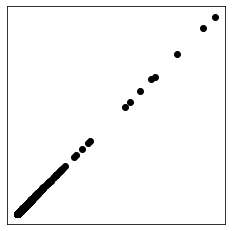

In [211]:
df_test_show=df_test.sample(frac=0.3)
df_pred_show=df_pred.iloc[df_test_show.index]

for sp in labels:
    x=df_test_show[sp]
    y=df_pred_show[sp]   
    plt.scatter(x,y,c='k')
    ax=plt.gca()
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig('{0}_r2.eps'.format(sp),format='eps',bbox_inches='tight', pad_inches=0)
    
!mkdir figs
!mv *.eps figs

# wireframe plots

In [204]:
from mpl_toolkits import mplot3d
def wireframe_plot(x,y,z,sp):
    ax=plt.axes(projection='3d')
    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    # ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    # ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    # ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.set_axis_off()
    ax.plot_wireframe(x,y,z)
    plt.savefig('{0}_wireframe.eps'.format(sp),format='eps',bbox_inches='tight', pad_inches=0)

!rm *.eps

## plots from original table

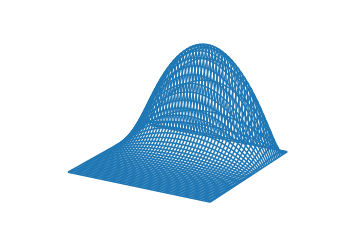

In [205]:
x=df[df.zeta==0]['f'].values
y=df[df.zeta==0]['pv'].values
x=x.reshape(501,-1)
y=y.reshape(501,-1)

for sp in labels:
    for zl in zeta_level:
        z=df[df.zeta==zl][sp].values
        z=z.reshape(501,-1)
        wireframe_plot(x,y,z,'{0}_zeta_{1}_tab'.format(sp,zl))

## plots form DNN

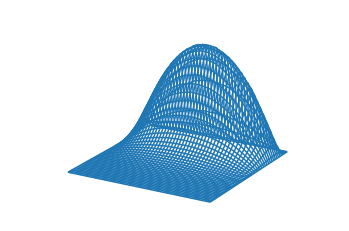

In [206]:
dnn_val = model.predict(x_input,batch_size=1024*8)
dnn_df = pd.DataFrame(out_scaler.inverse_transform(predict_val), columns=labels)

df_dnn=pd.concat([df[input_features],dnn_df],axis=1)
# df_dnn.head(5)

for sp in labels:
    for zl in zeta_level:
        z=df_dnn[df_dnn.zeta==zl][sp].values
        z=z.reshape(501,-1)
        wireframe_plot(x,y,z,'{0}_zeta_{1}_dnn'.format(sp,zl))

## plots of difference

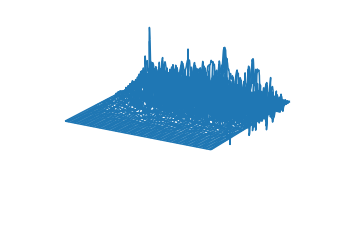

In [207]:
for sp in labels:
    for zl in zeta_level:
        z=df_dnn[df_dnn.zeta==zl][sp].values - df[df.zeta==zl][sp].values
        z=z.reshape(501,-1)
        wireframe_plot(x,y,z,'{0}_zeta_{1}_diff'.format(sp,zl))

In [208]:
!mv *.eps figs